In [1]:
"""
Author: Surabhi S Nath
Description: This script implements descriptive analysis on the data.
"""

'\nAuthor: Surabhi S Nath\nDescription: This script implements descriptive analysis on the data.\n'

# Imports

In [2]:
import numpy as np
import pandas as pd
import json
import os
import datetime
import statistics as stats
import math
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
import itertools
from tqdm import tqdm
import random
random.seed(1)
from PIL import Image
import sys
sys.path.insert(1, '../../measures/intricacy/')
from calculate_intricacy import *
sys.path.insert(1, '../../measures/local spatial complexity/')
from calculate_local_spatial_complexity import *
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_theme()
sns.set(font_scale=1.5, font="serif")
from scipy import stats
pd.set_option('display.max_colwidth', 10000)

# Load Data

In [3]:
grid_data = pd.read_csv("utils/grid_data.csv")
click_data = pd.read_csv("utils/click_data.csv")
info = pd.read_csv("utils/info.csv")

# Analyses

## Correlations

In [4]:
grid_data.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,Subject,grid_id,pattern,trial,num_clicks,underlying_LSC,underlying_intricacy,final_LSC,final_intricacy,avg_LSC,avg_intricacy,avg_change_in_LSC,avg_change_in_intricacy,final_change_in_LSC,final_change_in_intricacy,time_spent,cumulative_time,cumulative_time_bin,avg_change_in_pos
Subject,1.000000,-0.156086,-0.043914,-0.156086,0.022934,0.008693,0.004144,-0.009467,-0.032612,-0.005326,-0.027626,-0.029695,-0.050535,-0.026985,-0.061576,0.182738,-0.012547,-0.014697,-0.242024
grid_id,-0.156086,1.000000,-0.059622,1.000000,-0.479020,0.002408,-0.000869,-0.150794,0.043228,-0.132269,0.030823,-0.037305,-0.024879,-0.035321,-0.055467,-0.544682,0.818319,0.816050,0.034139
pattern,-0.043914,-0.059622,1.000000,-0.059622,0.063823,0.141722,0.081350,0.117694,0.053486,0.118322,0.055713,0.148064,0.093668,0.091141,0.053603,0.044002,-0.052348,-0.056605,-0.080050
trial,-0.156086,1.000000,-0.059622,1.000000,-0.479020,0.002408,-0.000869,-0.150794,0.043228,-0.132269,0.030823,-0.037305,-0.024879,-0.035321,-0.055467,-0.544682,0.818319,0.816050,0.034139
num_clicks,0.022934,-0.479020,0.063823,-0.479020,1.000000,-0.048664,-0.029636,0.218493,-0.156477,0.197014,-0.158419,-0.020942,-0.005610,-0.014197,0.028691,0.782669,-0.222437,-0.224413,-0.012140
underlying_LSC,0.008693,0.002408,0.141722,0.002408,-0.048664,1.000000,0.615785,0.708813,0.414134,0.708662,0.415279,0.752013,0.428087,0.478992,0.190428,-0.049053,0.008101,0.006868,-0.084082
underlying_intricacy,0.004144,-0.000869,0.081350,-0.000869,-0.029636,0.615785,1.000000,0.398177,0.671877,0.407620,0.641248,0.443373,0.665846,0.287102,0.393565,-0.026962,0.013879,0.012785,-0.057220
final_LSC,-0.009467,-0.150794,0.117694,-0.150794,0.218493,0.708813,0.398177,1.000000,0.382521,0.976126,0.395860,0.859250,0.402079,0.545771,0.175776,0.170506,-0.084384,-0.083686,-0.048880
final_intricacy,-0.032612,0.043228,0.053486,0.043228,-0.156477,0.414134,0.671877,0.382521,1.000000,0.402917,0.959040,0.439324,0.876828,0.260232,0.496785,-0.126106,0.018303,0.018597,-0.013400
avg_LSC,-0.005326,-0.132269,0.118322,-0.132269,0.197014,0.708662,0.407620,0.976126,0.402917,1.000000,0.430538,0.847526,0.416867,0.484216,0.162839,0.149929,-0.074561,-0.075050,-0.056742


## Demographics

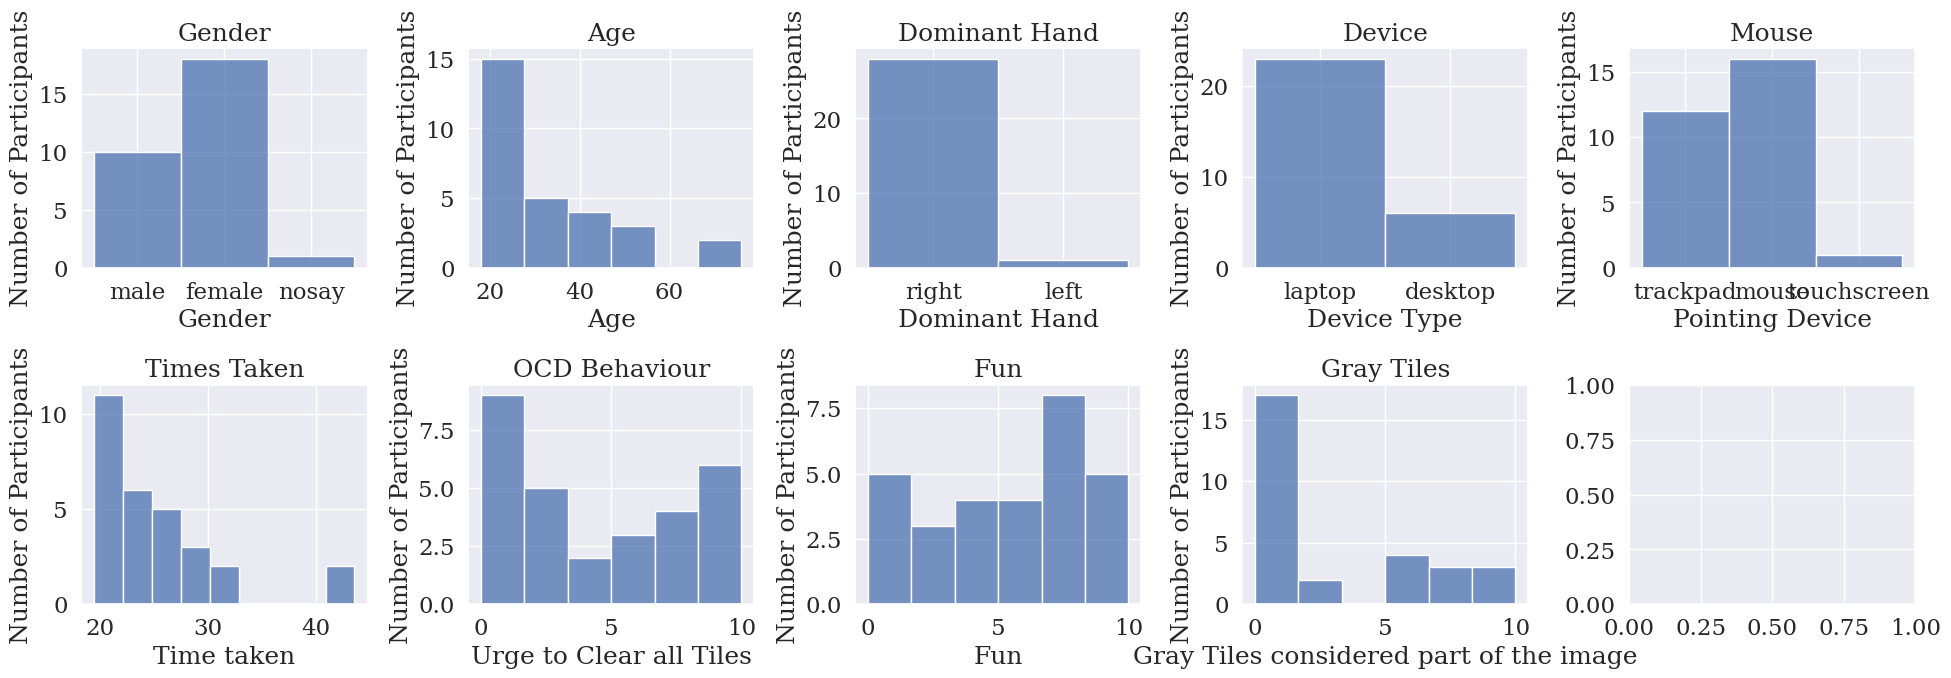

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(20,7))

sns.histplot(ax=axs[0,0], data=info["gender"])
axs[0,0].set_title("Gender")
axs[0,0].set_xlabel("Gender")
axs[0,0].set_ylabel("Number of Participants")

sns.histplot(ax=axs[0,1], data=info["age"])
axs[0,1].set_title("Age")
axs[0,1].set_xlabel("Age")
axs[0,1].set_ylabel("Number of Participants")

sns.histplot(ax=axs[0,2], data=info["dominant_hand"])
axs[0,2].set_title("Dominant Hand")
axs[0,2].set_xlabel("Dominant Hand")
axs[0,2].set_ylabel("Number of Participants")

sns.histplot(ax=axs[0,3], data=info["device"])
axs[0,3].set_title("Device")
axs[0,3].set_xlabel("Device Type")
axs[0,3].set_ylabel("Number of Participants")

sns.histplot(ax=axs[0,4], data=info["mouse"])
axs[0,4].set_title("Mouse")
axs[0,4].set_xlabel("Pointing Device")
axs[0,4].set_ylabel("Number of Participants")

sns.histplot(ax=axs[1,0], data=info["time_taken"])
axs[1,0].set_title("Times Taken")
axs[1,0].set_xlabel("Time taken")
axs[1,0].set_ylabel("Number of Participants")

sns.histplot(ax=axs[1,1], data=info["ocd"])
axs[1,1].set_title("OCD Behaviour")
axs[1,1].set_xlabel("Urge to Clear all Tiles")
axs[1,1].set_ylabel("Number of Participants")

sns.histplot(ax=axs[1,2], data=info["fun"])
axs[1,2].set_title("Fun")
axs[1,2].set_xlabel("Fun")
axs[1,2].set_ylabel("Number of Participants")

sns.histplot(ax=axs[1,3], data=info["graytiles"])
axs[1,3].set_title("Gray Tiles")
axs[1,3].set_xlabel("Gray Tiles considered part of the image")
axs[1,3].set_ylabel("Number of Participants")

fig.tight_layout()

## Basic Stats

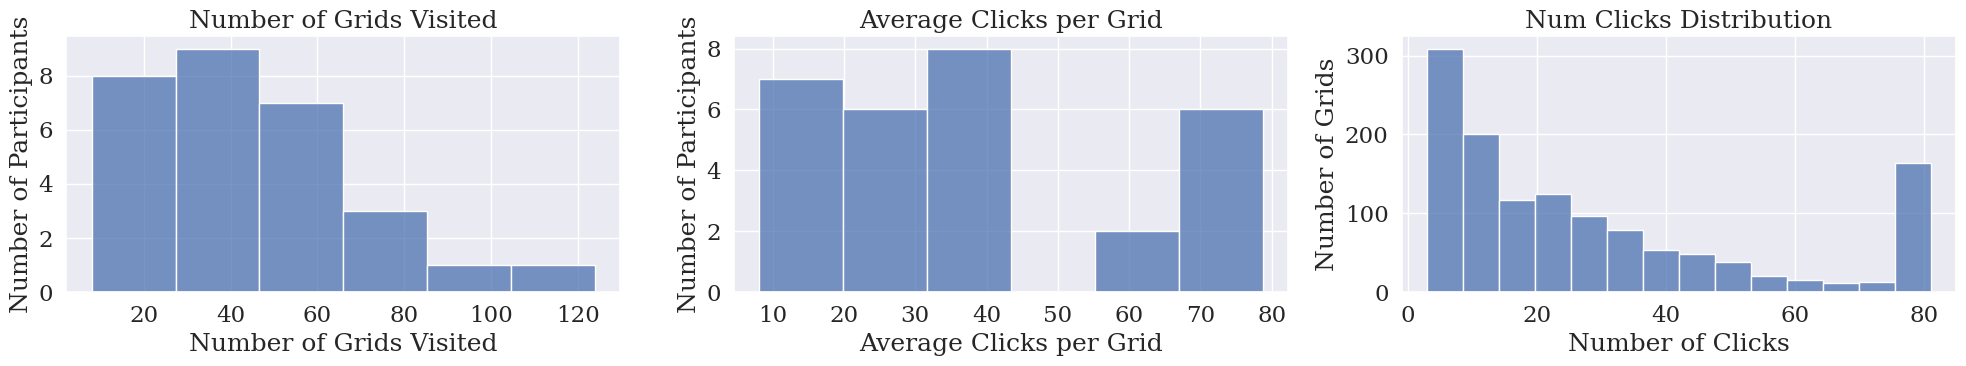

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(20,4))

sns.histplot(ax=axs[0], data=grid_data.groupby("Subject")["grid_id"].max().values)
axs[0].set_title("Number of Grids Visited")
axs[0].set_xlabel("Number of Grids Visited")
axs[0].set_ylabel("Number of Participants")

sns.histplot(ax=axs[1], data=grid_data.groupby("Subject")["num_clicks"].mean().values)
axs[1].set_title("Average Clicks per Grid")
axs[1].set_xlabel("Average Clicks per Grid")
axs[1].set_ylabel("Number of Participants")

# No clicks in mid range - only very small or very large
sns.histplot(ax=axs[2], data=grid_data["num_clicks"])
axs[2].set_title("Num Clicks Distribution")
axs[2].set_xlabel("Number of Clicks")
axs[2].set_ylabel("Number of Grids")

fig.tight_layout()

## Open-ended Responses

In [7]:
open_ended_answers = pd.DataFrame({"Exploration Startegy": info["strategy"],
                                  "Grids most opened": info["gridsmostopened"], 
                                  "Grids least opened": info["gridsleastopened"], 
                                  "Move on": info["moveon"]})
open_ended_answers

,Exploration Startegy,Grids most opened,Grids least opened,Move on
0,"I tried doing random clicks, and then varying patterns.",I cleared every part of the star grids except for one.,One that was disinteresting because it looked very randomized.,NaN
1,different strategies- sometimes starting in center or at edges,ones with designs that fascinated me (and ones towards the beginning),designs that were busy,NaN
2,"write messages, letters, random clicking, starting from corners, starting from center",ones with a clear pattern,ones with no clear pattern/ lots of free space,NaN
3,"at first random, but later made patterns to amuse myself",the symmetrical ones where I liked the pattern,ones that seemed random,NaN
4,Did random patterns that pleased me,"The star-gride didn't matter so much to me, the patterns I created did however.","The star-gride didn't matter so much to me, the patterns I created did however.",NaN
5,"No consistent strategy, although I did tend to clear them in rows or on the diagonal.",Most of the time I fully cleared each one regardless of the pattern.,"Ones where I felt like I could already ""see"" the pattern.",NaN
6,Not really any strategy just checking out some patterns and making my own patterns as well with the clouds :) alsp to clear faster i used two fingers on some pages,Im not sure,Not sure,NaN
7,clicking in the middle then on the sides to get an idea of what the pattern was,ones with a lot of blank space/hard to find patterns,ones that looked like qr codes,NaN
8,top to bottom,i cleared every star grid,i cleared every star grid,NaN
9,Seek patterns starting from the bottom or the middle,the black-white repeating squares patterns,some unrecognized patterns,NaN
